In [ ]:
import pandas as pd
import json
import glob
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import pandas as pd
import json
import glob

# Load and combine last week's calls
call_files = sorted(glob.glob('calls_1[1-9].json') + glob.glob('calls_20.json'))
call_dfs = []

for file in call_files:
    with open(file, 'r') as f:
        call_json = json.load(f)
    # Flatten the JSON structure
    df = pd.json_normalize(
        [
            {'location': loc, 'call_id': call_id, **details}
            for loc, calls in call_json.items()
            for call_id, details in calls.items()
        ]
    )
    call_dfs.append(df)

# Combine all call DataFrames
last_week_calls = pd.concat(call_dfs, ignore_index=True)

# Print the head of the combined calls DataFrame
print("Last Week's Calls:")
print(last_week_calls.head())



Last Week's Calls:
    location                                 call_id  \
0  bangalore  c_01fff45e-97dc-4e9f-b9a3-6f51cfac310b   
1  bangalore  c_0589d924-c598-48a5-a929-36f9c57788e3   
2  bangalore  c_ce4954bd-7153-41d5-a991-4960e7aadf22   
3  bangalore  c_0981d6bf-cf79-4ff0-9b8f-b610c6a8793b   
4  bangalore  c_f0357062-39c6-42e9-9641-02ca8a9d935f   

                         date tlf_number  \
0  2024-10-19 05:06:33.702526   92776451   
1  2024-10-24 21:23:51.702664   36465049   
2  2024-10-19 04:18:08.702710   45110674   
3  2024-10-22 16:46:38.702752   18376144   
4  2024-10-24 10:44:22.702793   86952015   

                         technical_problem difficulty  commission  
0  software_installation_and_configuration       easy       600.0  
1              account_and_security_issues       easy       568.0  
2                     email_related_issues       hard       840.0  
3                     email_related_issues     medium       700.0  
4                 operating_system_supp

In [ ]:
# Load and combine last week's reports
report_files = sorted(glob.glob('call_report_1[1-9].json') + glob.glob('call_report_20.json'))
report_dfs = []

for file in report_files:
    with open(file, 'r') as f:
        df = pd.read_json(f)
    report_dfs.append(df)

# Combine all report DataFrames
last_week_reports = pd.concat(report_dfs, ignore_index=True)

# Print the head of the combined reports DataFrame
print("\nLast Week's Reports:")
print(last_week_reports.head())


Last Week's Reports:
                                  call_id  \
0  c_01fff45e-97dc-4e9f-b9a3-6f51cfac310b   
1  c_57eff71b-31ea-4c73-8625-827572a86d48   
2  c_3919f51c-717b-4b81-af3e-29d19c54dfbd   
3  c_4a789e8c-c3f2-4005-bada-711acc2c1d95   
4  c_d8fd7cbe-4261-4847-8f8b-e2847c8f0814   

                                worker_id  call_time  likely_to_recommend  \
0  w_d84e2393-d286-4b59-a510-e7c83c9300f8  43.144179                  1.0   
1  w_d84e2393-d286-4b59-a510-e7c83c9300f8  44.644179                  1.0   
2  w_d84e2393-d286-4b59-a510-e7c83c9300f8  68.335185                  1.0   
3  w_d84e2393-d286-4b59-a510-e7c83c9300f8  71.644179                  1.0   
4  w_d84e2393-d286-4b59-a510-e7c83c9300f8  47.855174                  1.0   

   professional_score  call_profit  
0                 NaN          600  
1                 NaN          600  
2                 NaN          852  
3                 NaN          900  
4                 NaN          532  


In [ ]:
# Merge last week's calls and reports on 'call_id'
data = pd.merge(last_week_calls, last_week_reports, on='call_id')

# Display the first few rows
print("Merged Data:")
print(data.head())


Merged Data:
    location                                 call_id  \
0  bangalore  c_01fff45e-97dc-4e9f-b9a3-6f51cfac310b   
1  bangalore  c_0589d924-c598-48a5-a929-36f9c57788e3   
2  bangalore  c_ce4954bd-7153-41d5-a991-4960e7aadf22   
3  bangalore  c_0981d6bf-cf79-4ff0-9b8f-b610c6a8793b   
4  bangalore  c_f0357062-39c6-42e9-9641-02ca8a9d935f   

                         date tlf_number  \
0  2024-10-19 05:06:33.702526   92776451   
1  2024-10-24 21:23:51.702664   36465049   
2  2024-10-19 04:18:08.702710   45110674   
3  2024-10-22 16:46:38.702752   18376144   
4  2024-10-24 10:44:22.702793   86952015   

                         technical_problem difficulty  commission  \
0  software_installation_and_configuration       easy       600.0   
1              account_and_security_issues       easy       568.0   
2                     email_related_issues       hard       840.0   
3                     email_related_issues     medium       700.0   
4                 operating_system_suppo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")


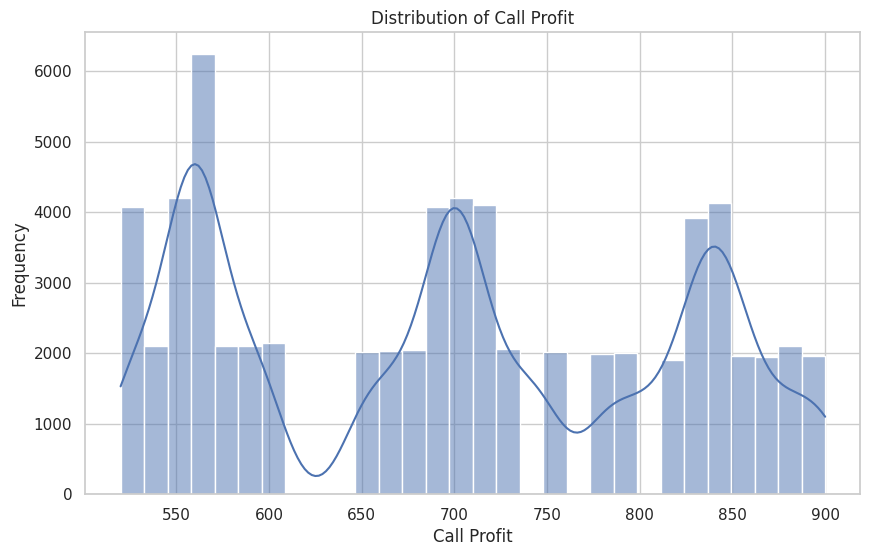

In [ ]:
# Histogram of call profit
plt.figure(figsize=(10, 6))
sns.histplot(data['call_profit'], kde=True, bins=30)
plt.title('Distribution of Call Profit')
plt.xlabel('Call Profit')
plt.ylabel('Frequency')
plt.show()


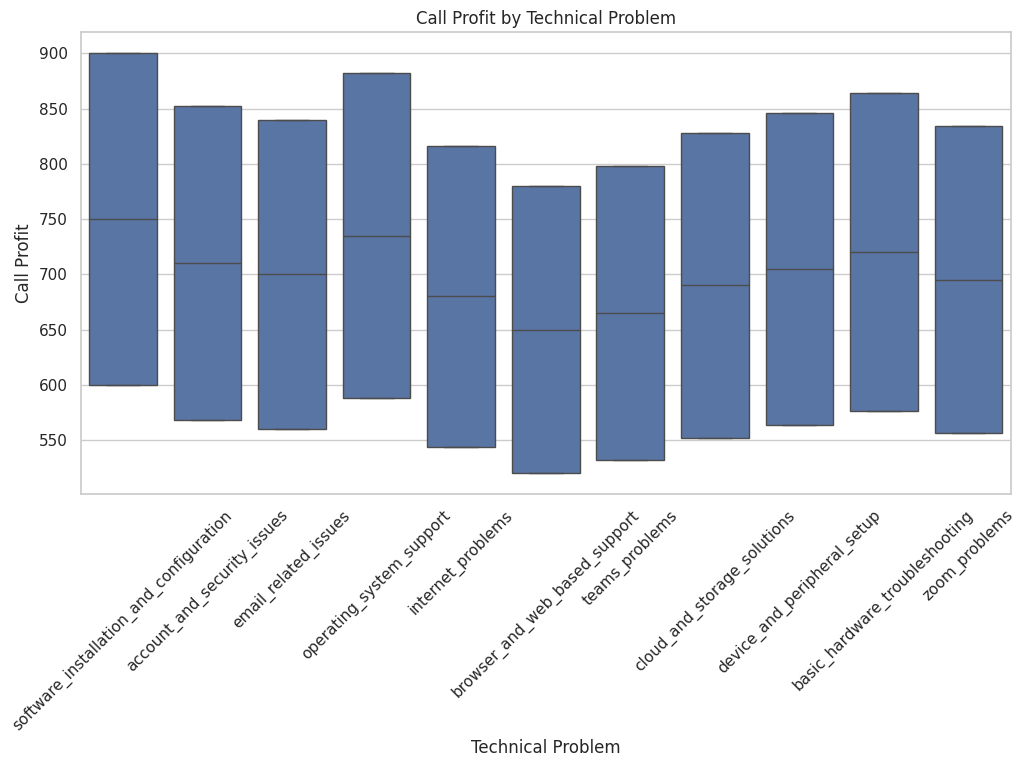

In [ ]:
# Box plot of call profit by technical problem
plt.figure(figsize=(12, 6))
sns.boxplot(x='technical_problem', y='call_profit', data=data)
plt.xticks(rotation=45)
plt.title('Call Profit by Technical Problem')
plt.xlabel('Technical Problem')
plt.ylabel('Call Profit')
plt.show()


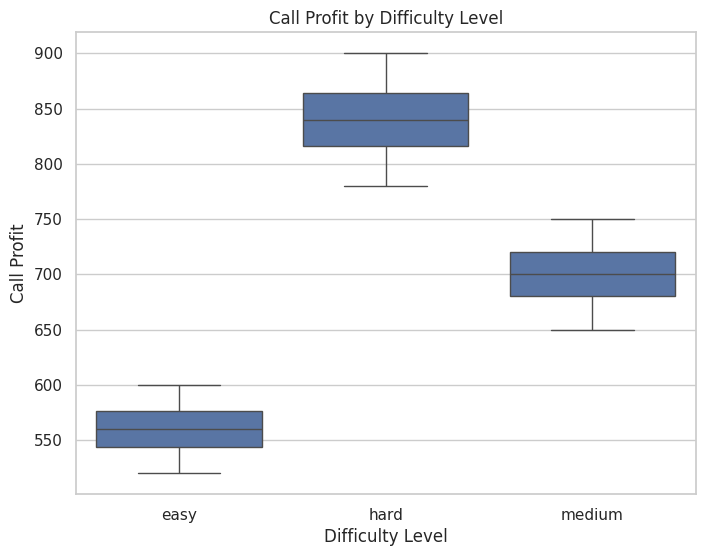

In [ ]:
# Box plot of call profit by difficulty level
plt.figure(figsize=(8, 6))
sns.boxplot(x='difficulty', y='call_profit', data=data)
plt.title('Call Profit by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Call Profit')
plt.show()


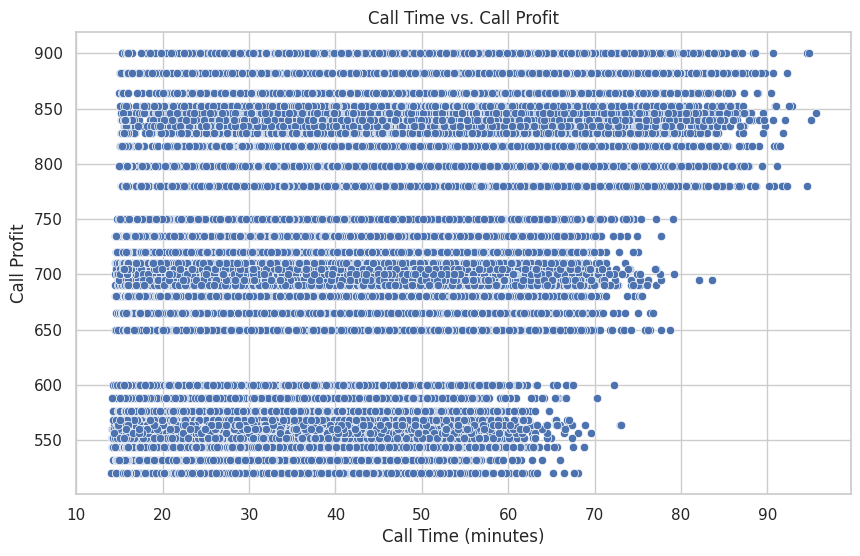

In [ ]:
# Scatter plot of call time vs. call profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='call_time', y='call_profit', data=data)
plt.title('Call Time vs. Call Profit')
plt.xlabel('Call Time (minutes)')
plt.ylabel('Call Profit')
plt.show()


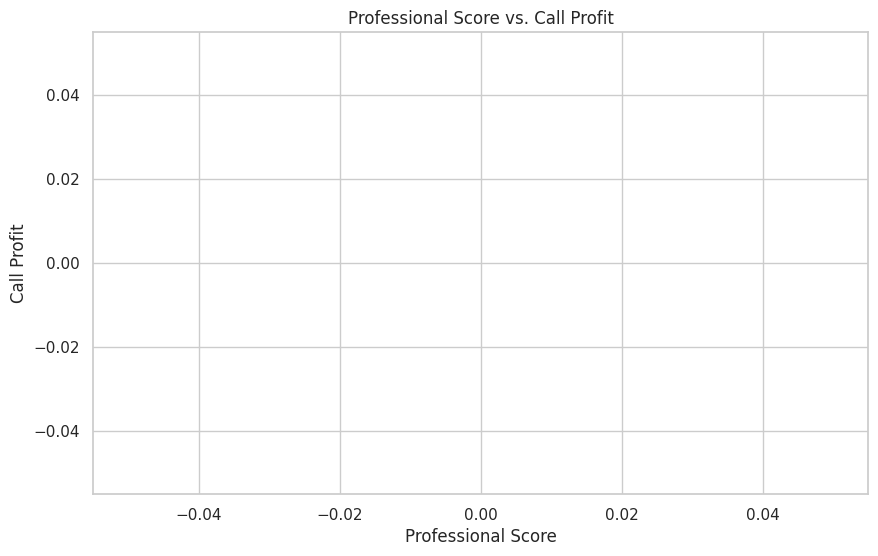

In [ ]:
# Scatter plot of professional score vs. call profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='professional_score', y='call_profit', data=data)
plt.title('Professional Score vs. Call Profit')
plt.xlabel('Professional Score')
plt.ylabel('Call Profit')
plt.show()


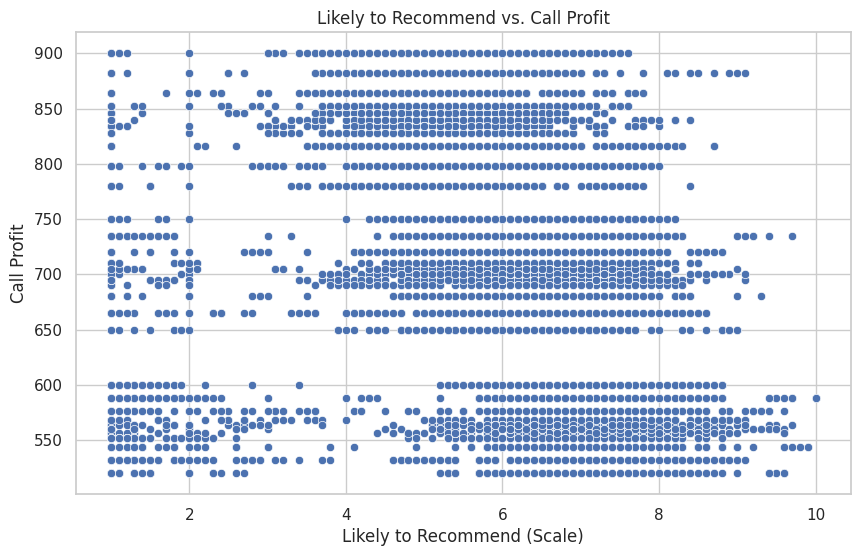

In [ ]:
# Scatter plot of likely to recommend vs. call profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likely_to_recommend', y='call_profit', data=data)
plt.title('Likely to Recommend vs. Call Profit')
plt.xlabel('Likely to Recommend (Scale)')
plt.ylabel('Call Profit')
plt.show()


In [ ]:
# Assuming 'data' is the merged DataFrame from previous steps
print("Columns in data:", data.columns)


Columns in data: Index(['location', 'call_id', 'date', 'tlf_number', 'technical_problem',
       'difficulty', 'commission', 'worker_id', 'call_time',
       'likely_to_recommend', 'professional_score', 'call_profit'],
      dtype='object')


In [ ]:
# Group by 'worker_id' and sum 'call_profit'
worker_profit = data.groupby('worker_id')['call_profit'].sum().reset_index()

# Sort by 'call_profit' in descending order
worker_profit.sort_values(by='call_profit', ascending=False, inplace=True)

# Display the top 10 workers by total profit
top_workers = worker_profit.head(10)
print("\nTop 10 Workers by Total Call Profit:")
print(top_workers)



Top 10 Workers by Total Call Profit:
                                  worker_id  call_profit
357  w_77e3b03d-daa7-46c5-83c3-36bf5a68cb98       120178
370  w_7c35d18a-546f-49a8-9d3a-bc311c0ac024       115378
163  w_3c60c0eb-b5d7-4f87-93c9-7de8595e196a       112756
248  w_54a73dfa-602c-4d2c-a3d4-0eee5ecdcac0       112626
462  w_9b472a03-24e7-44a1-b1e8-d31005ad428c       111682
70   w_17edb7b0-5744-453e-9f73-c8bfd934b2a1       108821
532  w_b58d0438-bb35-4272-9dd9-6806a11bc43d       106768
657  w_e1c56475-a538-4625-83d8-ee20402f72e6       106350
380  w_80d06b8c-40e0-47c7-abb0-beff6a1404af       106223
709  w_f118fb15-8162-4c85-8665-a6729afe9836       103825


<ipython-input-21-d087a6a7b6ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='worker_id', y='call_profit', data=top_workers, palette='viridis')


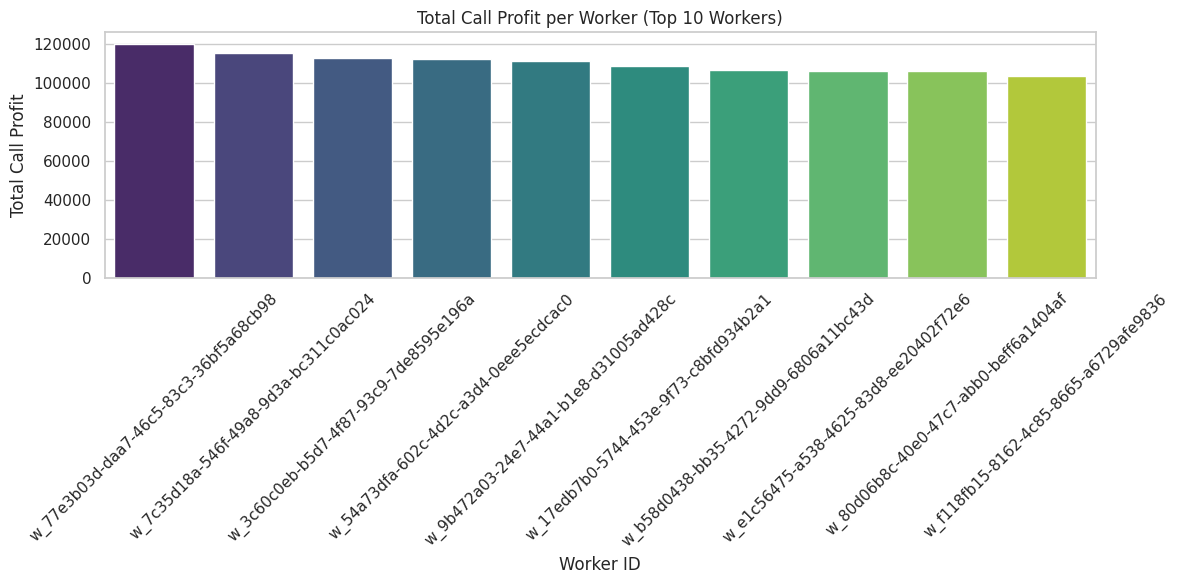

In [ ]:
# Bar chart of total call profit per worker
plt.figure(figsize=(12, 6))
sns.barplot(x='worker_id', y='call_profit', data=top_workers, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Total Call Profit per Worker (Top 10 Workers)')
plt.xlabel('Worker ID')
plt.ylabel('Total Call Profit')
plt.tight_layout()
plt.show()


In [ ]:
# Group by 'worker_id' and calculate average 'call_profit'
worker_avg_profit = data.groupby('worker_id')['call_profit'].mean().reset_index()

# Sort by 'call_profit' in descending order
worker_avg_profit.sort_values(by='call_profit', ascending=False, inplace=True)

# Display the top 10 workers by average profit
top_avg_workers = worker_avg_profit.head(10)
print("\nTop 10 Workers by Average Call Profit:")
print(top_avg_workers)



Top 10 Workers by Average Call Profit:
                                  worker_id  call_profit
712  w_f18344a9-e21f-442f-abd1-02acbc2672dc   737.554054
105  w_24cde67c-4f56-4df6-9e2b-bf95dd79a47b   735.518072
9    w_04fe60f0-29d6-4572-8b57-c167dd4edcc9   731.732558
383  w_81523077-2c5c-4b77-a4c5-5ce594d0f7a2   730.587500
144  w_349fdbcb-da35-49e7-ae56-652022e3fe20   730.465753
253  w_5652491b-c407-48dc-ad56-b95e082e5558   728.807339
544  w_b7774fa1-1e18-4087-91e3-c2689bfd22b0   727.637681
521  w_b07c1a52-f307-4940-8603-fbae2cecaf14   727.181818
622  w_d6b27e75-a04c-4f67-89bf-38239082c938   727.013514
277  w_5dcf52dd-422d-4be0-8763-e3ab43dcd39c   725.759036


<ipython-input-23-f1a067ffcefc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='worker_id', y='call_profit', data=top_avg_workers, palette='magma')


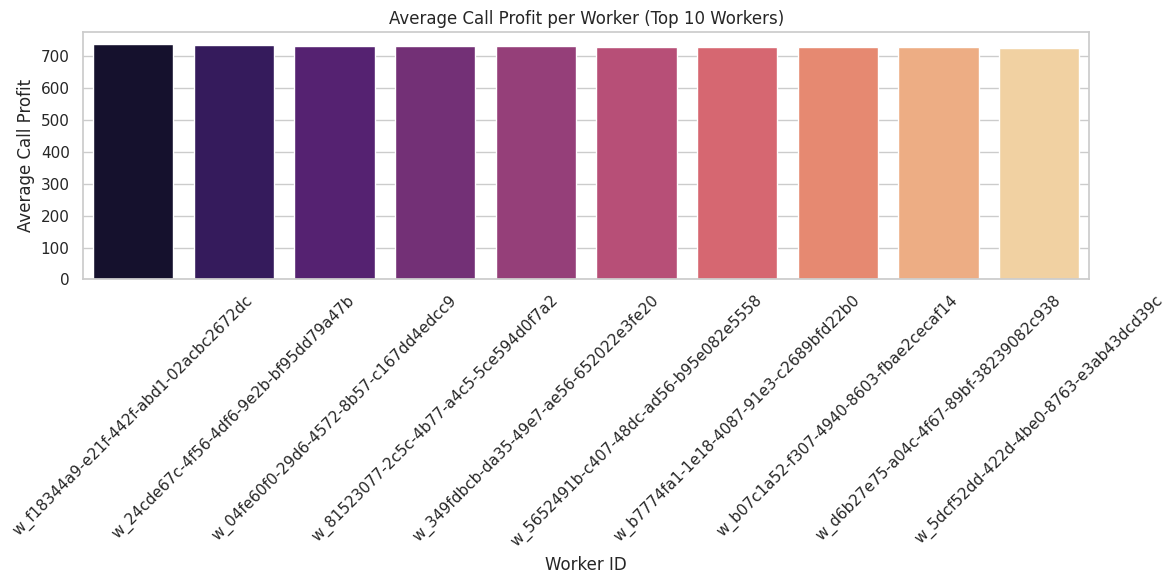

In [ ]:
# Bar chart of average call profit per worker
plt.figure(figsize=(12, 6))
sns.barplot(x='worker_id', y='call_profit', data=top_avg_workers, palette='magma')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Average Call Profit per Worker (Top 10 Workers)')
plt.xlabel('Worker ID')
plt.ylabel('Average Call Profit')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the number of calls per worker
worker_call_counts = data['worker_id'].value_counts().reset_index()
worker_call_counts.columns = ['worker_id', 'call_count']

# Select workers with at least 5 calls
workers_with_enough_calls = worker_call_counts[worker_call_counts['call_count'] >= 5]['worker_id']

# Filter data for these workers
data_filtered = data[data['worker_id'].isin(workers_with_enough_calls)]


<ipython-input-25-3accfc864842>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='worker_id', y='call_profit', data=data_top_workers, palette='Set2')


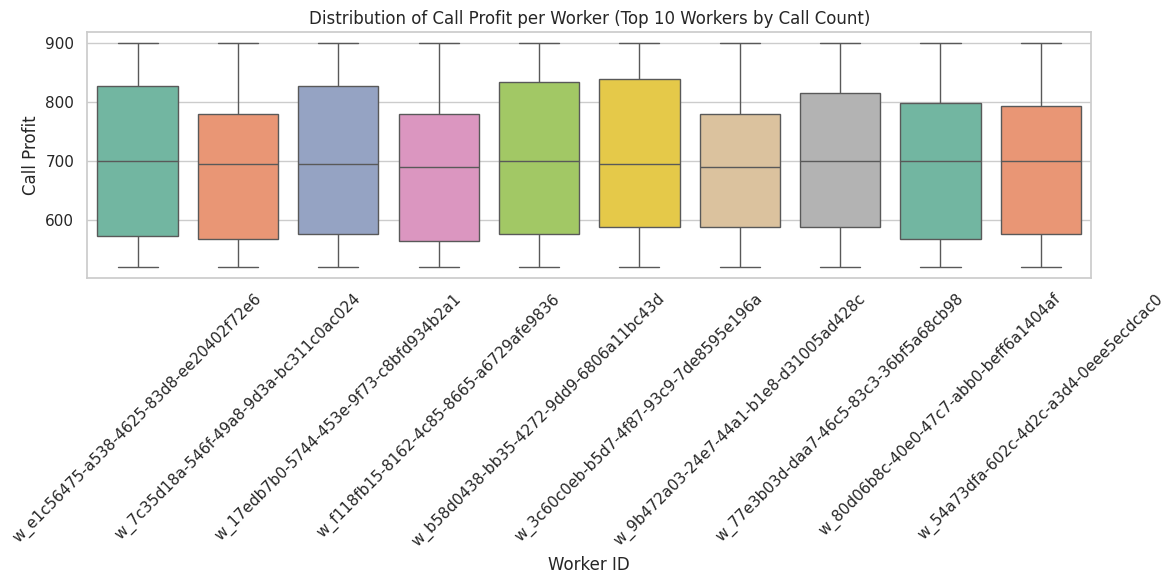

In [ ]:
# For visualization purposes, select the top 10 workers by call count
top_workers_by_calls = worker_call_counts.head(10)['worker_id']
data_top_workers = data[data['worker_id'].isin(top_workers_by_calls)]

# Box plot of call profit distribution per worker
plt.figure(figsize=(12, 6))
sns.boxplot(x='worker_id', y='call_profit', data=data_top_workers, palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Distribution of Call Profit per Worker (Top 10 Workers by Call Count)')
plt.xlabel('Worker ID')
plt.ylabel('Call Profit')
plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# If there are missing values in numerical columns, fill them with the mean or median
numerical_cols = ['call_time', 'likely_to_recommend', 'call_profit']
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# If there are missing values in categorical columns, fill them with the mode
categorical_cols = ['technical_problem', 'difficulty', 'location', 'worker_id']
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)


Missing values in each column:
location                   0
call_id                    0
date                       0
tlf_number                 0
technical_problem          0
difficulty                 0
commission                 0
worker_id                  0
call_time                  0
likely_to_recommend        0
professional_score     67401
call_profit                0
dtype: int64


In [ ]:
# Convert 'date' to datetime if necessary
# Convert 'date' to datetime, inferring format
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')


# Verify data types
print("\nData types of each column:")
print(data.dtypes)



Data types of each column:
location                       object
call_id                        object
date                   datetime64[ns]
tlf_number                     object
technical_problem              object
difficulty                     object
commission                    float64
worker_id                      object
call_time                     float64
likely_to_recommend           float64
professional_score            float64
call_profit                     int64
dtype: object


<ipython-input-28-85dc9b5ad180>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')


In [ ]:
# Check for any unparsed dates
missing_dates = data['date'].isnull().sum()
if missing_dates > 0:
    print(f"\nNumber of unparsed dates: {missing_dates}")
    # Handle unparsed dates if necessary
    # For example, drop rows with unparsed dates
    # data = data.dropna(subset=['date'])
    # Or fill with a default date
    # data['date'].fillna(pd.Timestamp('2024-01-01'), inplace=True)

# Verify data types
print("\nData types of each column:")
print(data.dtypes)

# Proceed with the rest of the code...


Number of unparsed dates: 1

Data types of each column:
location                       object
call_id                        object
date                   datetime64[ns]
tlf_number                     object
technical_problem              object
difficulty                     object
commission                    float64
worker_id                      object
call_time                     float64
likely_to_recommend           float64
professional_score            float64
call_profit                     int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original data
data_encoded = data.copy()

# Initialize a dictionary to store label encoders
label_encoders = {}

# Encode categorical variables
categorical_cols = ['technical_problem', 'difficulty', 'location', 'worker_id']

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # Save the encoder for future use


In [ ]:
# Define the features (X) and target variable (y)
features = ['technical_problem', 'difficulty', 'call_time', 'likely_to_recommend', 'worker_id']
target = 'call_profit'

X = data_encoded[features]
y = data_encoded[target]

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")



Model Performance:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R²) Score: 1.00


In [ ]:
# Verify that training and testing sets are disjoint
train_indices = X_train.index
test_indices = X_test.index

common_indices = train_indices.intersection(test_indices)
print(f"Number of common indices between training and test sets: {len(common_indices)}")


Number of common indices between training and test sets: 0


In [ ]:
# Check for duplicates in the entire dataset
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_rows}")


Number of duplicate rows in the dataset: 0


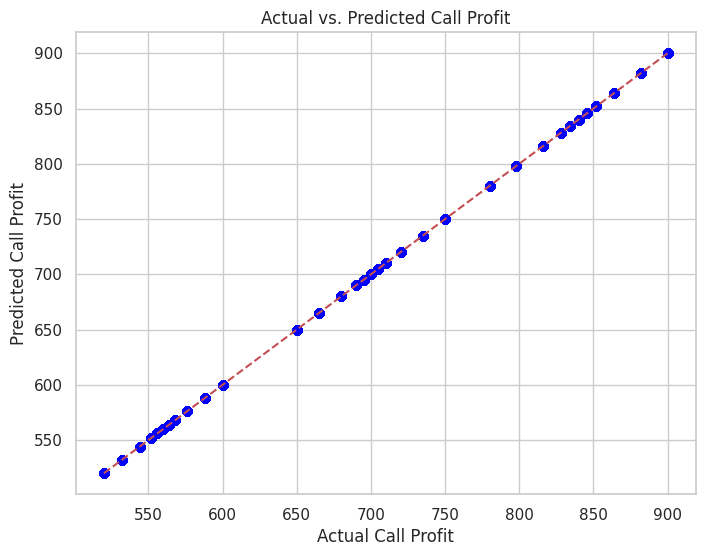

In [ ]:
import matplotlib.pyplot as plt

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Call Profit')
plt.ylabel('Predicted Call Profit')
plt.title('Actual vs. Predicted Call Profit')
plt.show()


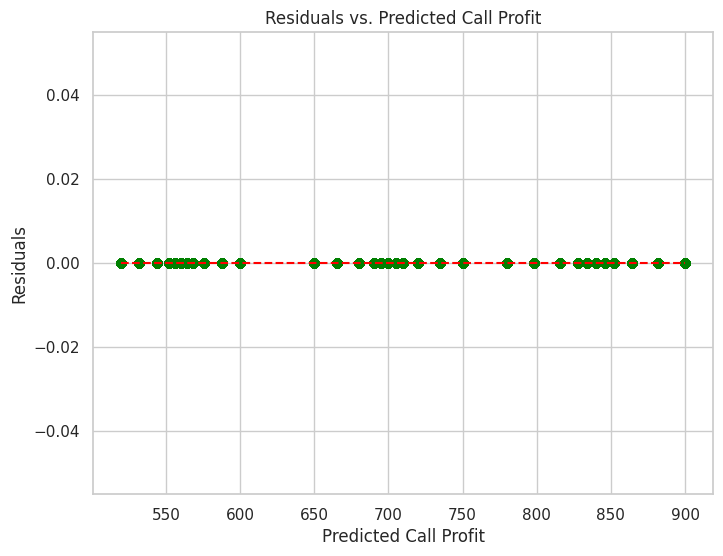

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted Call Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Call Profit')
plt.show()


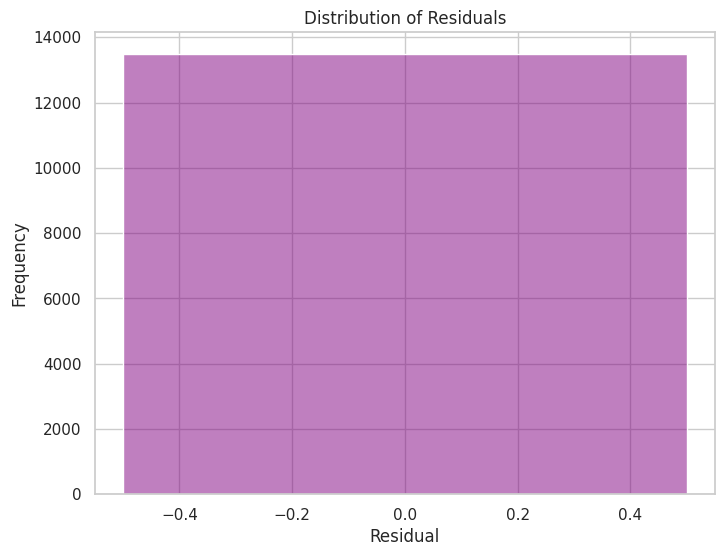

In [ ]:
import seaborn as sns

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


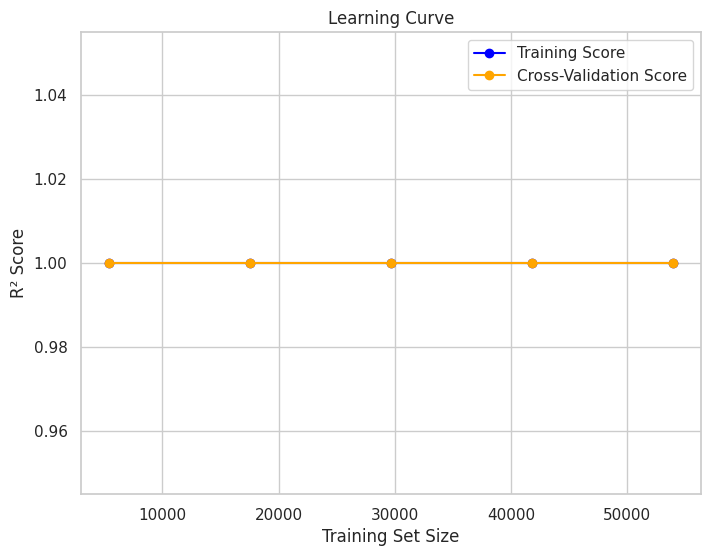

In [ ]:
import numpy as np

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


<ipython-input-42-83b85e0b4cad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_d')


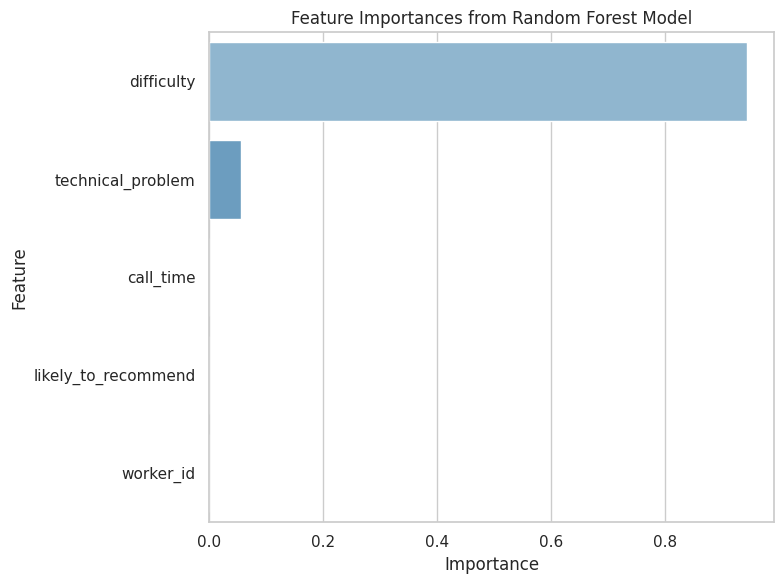

In [ ]:
# Feature Importances
importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_d')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import json
import glob
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load next week's call files named 'call_21.json' to 'call_30.json'
call_files = sorted(glob.glob('calls_2[1-9].json') + glob.glob('calls_30.json'))
call_dfs = []

for file in call_files:
    with open(file, 'r') as f:
        call_json = json.load(f)
    # Flatten the JSON structure
    df = pd.json_normalize(
        [
            {'location': loc, 'call_id': call_id, **details}
            for loc, calls in call_json.items()
            for call_id, details in calls.items()
        ]
    )
    call_dfs.append(df)

# Combine all next week's call DataFrames
next_week_calls = pd.concat(call_dfs, ignore_index=True)

# Display the head of the DataFrame
print("Next Week's Calls:")
print(next_week_calls.head())


Next Week's Calls:
    location                                 call_id  \
0  bangalore  c_652cc84e-8471-468e-9d74-0c9dbf0de950   
1  bangalore  c_29f1c17a-b748-4602-974d-7e9d1f268805   
2  bangalore  c_891bcabb-05f6-49ce-bb6d-c38009d4cbc7   
3  bangalore  c_f2086fab-2fec-4ada-9538-1633284fbf23   
4  bangalore  c_01825be3-0a7e-4301-bd93-8c111c4ddcae   

                        date tlf_number               technical_problem  \
0  1970-01-01 00:00:00+00:00   88789779     device_and_peripheral_setup   
1  1970-01-01 00:00:00+00:00   33696591     account_and_security_issues   
2  1970-01-01 00:00:00+00:00   97885545                   zoom_problems   
3  1970-01-01 00:00:00+00:00   96234276  basic_hardware_troubleshooting   
4  1970-01-01 00:00:00+00:00   25261863               internet_problems   

  difficulty  commission  
0     medium       705.0  
1     medium       710.0  
2     medium       695.0  
3     medium       720.0  
4       hard       816.0  


In [ ]:
# Check for missing values
print("\nMissing values in next week's calls:")
print(next_week_calls.isnull().sum())

# Handle missing values if necessary
# For this example, we'll assume there are no missing values



Missing values in next week's calls:
location             0
call_id              0
date                 0
tlf_number           0
technical_problem    0
difficulty           0
commission           0
dtype: int64


In [ ]:
# Convert 'date' to datetime, handling mixed formats
next_week_calls['date'] = pd.to_datetime(next_week_calls['date'], infer_datetime_format=True, errors='coerce')

# Fill missing dates if any
missing_dates = next_week_calls['date'].isnull().sum()
if missing_dates > 0:
    print(f"\nNumber of unparsed dates: {missing_dates}")
    # Fill with a default date or handle appropriately
    next_week_calls['date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


<ipython-input-48-5a46b18c8c3c>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  next_week_calls['date'] = pd.to_datetime(next_week_calls['date'], infer_datetime_format=True, errors='coerce')


In [ ]:
# Ensure you have label_encoders dictionary from the model training step
# If not, you need to initialize and fit them using the training data
# For this example, we'll assume label_encoders are available


In [ ]:
categorical_cols = ['technical_problem', 'difficulty', 'location']

for col in categorical_cols:
    le = label_encoders[col]
    # Map unseen categories to the most common category
    next_week_calls[col] = next_week_calls[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    most_common = data_encoded[col].mode()[0]
    next_week_calls[col].replace(-1, most_common, inplace=True)


<ipython-input-50-aba290601aec>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  next_week_calls[col].replace(-1, most_common, inplace=True)
<ipython-input-50-aba290601aec>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# Use average values from the training data
average_call_time = data['call_time'].mean()
average_likely_to_recommend = data['likely_to_recommend'].mean()
most_common_worker_id = data_encoded['worker_id'].mode()[0]

# Add these columns to next_week_calls
next_week_calls['call_time'] = average_call_time
next_week_calls['likely_to_recommend'] = average_likely_to_recommend
next_week_calls['worker_id'] = most_common_worker_id


In [ ]:
features = ['technical_problem', 'difficulty', 'call_time', 'likely_to_recommend', 'worker_id']


In [ ]:
X_next_week = next_week_calls[features]


In [ ]:
# Predict call profit
next_week_calls['predicted_profit'] = model.predict(X_next_week)

# Display predicted profits
print("\nPredicted Profits for Next Week's Calls:")
print(next_week_calls[['call_id', 'predicted_profit']].head())



Predicted Profits for Next Week's Calls:
                                  call_id  predicted_profit
0  c_652cc84e-8471-468e-9d74-0c9dbf0de950             705.0
1  c_29f1c17a-b748-4602-974d-7e9d1f268805             710.0
2  c_891bcabb-05f6-49ce-bb6d-c38009d4cbc7             695.0
3  c_f2086fab-2fec-4ada-9538-1633284fbf23             720.0
4  c_01825be3-0a7e-4301-bd93-8c111c4ddcae             816.0


In [ ]:
possible_technical_problems = data_encoded['technical_problem'].unique()
possible_difficulties = data_encoded['difficulty'].unique()


In [ ]:
def optimize_call(row):
    best_profit = row['predicted_profit']
    best_technical_problem = row['technical_problem']
    best_difficulty = row['difficulty']

    for tech_problem in possible_technical_problems:
        for difficulty in possible_difficulties:
            row_copy = row.copy()
            row_copy['technical_problem'] = tech_problem
            row_copy['difficulty'] = difficulty
            # Prepare the row for prediction as a DataFrame with correct feature names
            row_for_prediction = pd.DataFrame([row_copy[features]])
            profit = model.predict(row_for_prediction)[0]
            if profit > best_profit:
                best_profit = profit
                best_technical_problem = tech_problem
                best_difficulty = difficulty
    # Create a new Series with updated values
    updated_row = row.copy()
    updated_row['technical_problem'] = best_technical_problem
    updated_row['difficulty'] = best_difficulty
    updated_row['optimized_profit'] = best_profit
    return updated_row


In [ ]:
import itertools

# Get unique encoded values of technical_problem and difficulty
possible_technical_problems = data_encoded['technical_problem'].unique()
possible_difficulties = data_encoded['difficulty'].unique()

# Create a DataFrame with all possible combinations
combinations = pd.DataFrame(list(itertools.product(possible_technical_problems, possible_difficulties)),
                            columns=['technical_problem', 'difficulty'])



In [ ]:
# Add a key column to facilitate the merge
next_week_calls['key'] = 1
combinations['key'] = 1

# Merge to get cartesian product
expanded_calls = next_week_calls.merge(combinations, on='key').drop('key', axis=1)


In [ ]:
# Prepare features for prediction
features = ['technical_problem', 'difficulty', 'call_time', 'likely_to_recommend', 'worker_id']

# Use the new technical_problem and difficulty from combinations
expanded_calls['technical_problem'] = expanded_calls['technical_problem_y']
expanded_calls['difficulty'] = expanded_calls['difficulty_y']

# Drop the original columns
expanded_calls = expanded_calls.drop(['technical_problem_x', 'difficulty_x', 'technical_problem_y', 'difficulty_y'], axis=1)

# Reorder columns
expanded_calls = expanded_calls[features + [col for col in expanded_calls.columns if col not in features]]

# Predict profits
X_expanded = expanded_calls[features]
expanded_calls['predicted_profit'] = model.predict(X_expanded)


In [ ]:
# Group by original call_id and select the row with the maximum predicted profit
optimized_calls = expanded_calls.loc[expanded_calls.groupby('call_id')['predicted_profit'].idxmax()].reset_index(drop=True)


In [ ]:
# Original total predicted profit
total_predicted_profit_before = next_week_calls['predicted_profit'].sum()

# Total predicted profit after optimization
total_predicted_profit_after = optimized_calls['predicted_profit'].sum()

profit_increase = total_predicted_profit_after - total_predicted_profit_before

print(f"\nTotal Predicted Profit Before Optimization: {total_predicted_profit_before:.2f}")
print(f"Total Predicted Profit After Optimization: {total_predicted_profit_after:.2f}")
print(f"Increase in Predicted Profit: {profit_increase:.2f}")



Total Predicted Profit Before Optimization: 182431944.00
Total Predicted Profit After Optimization: 234459900.00
Increase in Predicted Profit: 52027956.00


In [ ]:
# Decode 'technical_problem' and 'difficulty' columns
for col in ['technical_problem', 'difficulty']:
    le = label_encoders[col]
    next_week_calls[col] = le.inverse_transform(next_week_calls[col].astype(int))


In [ ]:
###UPDATING JSON FILE. (NEXT WEEKS CALLS)

In [ ]:
import pandas as pd
import json
import glob
import numpy as np
import os

# Load next week's call files named 'call_21.json' to 'call_30.json'
call_files = sorted(glob.glob('calls_2[1-9].json') + glob.glob('calls_30.json'))
call_dfs = []

for file in call_files:
    with open(file, 'r') as f:
        call_json = json.load(f)
    # Flatten the JSON structure and include the file name
    df = pd.json_normalize(
        [
            {'source_file': file, 'location': loc, 'call_id': call_id, **details}
            for loc, calls in call_json.items()
            for call_id, details in calls.items()
        ]
    )
    call_dfs.append(df)

# Combine all next week's call DataFrames
next_week_calls = pd.concat(call_dfs, ignore_index=True)

# Display the head of the DataFrame
print("Next Week's Calls:")
print(next_week_calls.head())


Next Week's Calls:
     source_file   location                                 call_id  \
0  calls_21.json  bangalore  c_652cc84e-8471-468e-9d74-0c9dbf0de950   
1  calls_21.json  bangalore  c_29f1c17a-b748-4602-974d-7e9d1f268805   
2  calls_21.json  bangalore  c_891bcabb-05f6-49ce-bb6d-c38009d4cbc7   
3  calls_21.json  bangalore  c_f2086fab-2fec-4ada-9538-1633284fbf23   
4  calls_21.json  bangalore  c_01825be3-0a7e-4301-bd93-8c111c4ddcae   

                        date tlf_number               technical_problem  \
0  1970-01-01 00:00:00+00:00   88789779     device_and_peripheral_setup   
1  1970-01-01 00:00:00+00:00   33696591     account_and_security_issues   
2  1970-01-01 00:00:00+00:00   97885545                   zoom_problems   
3  1970-01-01 00:00:00+00:00   96234276  basic_hardware_troubleshooting   
4  1970-01-01 00:00:00+00:00   25261863               internet_problems   

  difficulty  commission  
0     medium       705.0  
1     medium       710.0  
2     medium       695

In [ ]:
import pandas as pd
import json
import glob
import numpy as np
import os
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load next week's call files named 'call_21.json' to 'call_30.json'
call_files = sorted(glob.glob('calls_2[1-9].json') + glob.glob('calls_30.json'))
call_dfs = []

for file in call_files:
    with open(file, 'r') as f:
        call_json = json.load(f)
    # Flatten the JSON structure and include the source file
    df = pd.json_normalize(
        [
            {'source_file': file, 'location': loc, 'call_id': call_id, **details}
            for loc, calls in call_json.items()
            for call_id, details in calls.items()
        ]
    )
    call_dfs.append(df)

# Combine all next week's call DataFrames
next_week_calls = pd.concat(call_dfs, ignore_index=True)
print("Next Week's Calls:")
print(next_week_calls.head())

# Encode categorical variables
categorical_cols = ['technical_problem', 'difficulty', 'location']

for col in categorical_cols:
    le = label_encoders[col]
    next_week_calls[col] = next_week_calls[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    most_common = data_encoded[col].mode()[0]
    # Fixing the FutureWarning by avoiding chained assignment
    next_week_calls[col] = next_week_calls[col].replace(-1, most_common)

# Add average features
average_call_time = data['call_time'].mean()
average_likely_to_recommend = data['likely_to_recommend'].mean()
most_common_worker_id = data_encoded['worker_id'].mode()[0]

next_week_calls['call_time'] = average_call_time
next_week_calls['likely_to_recommend'] = average_likely_to_recommend
next_week_calls['worker_id'] = most_common_worker_id

# Predict profits
features = ['technical_problem', 'difficulty', 'call_time', 'likely_to_recommend', 'worker_id']
X_next_week = next_week_calls[features]
next_week_calls['predicted_profit'] = model.predict(X_next_week)

# Optimize Calls Using Vectorized Approach

# Prepare possible combinations
possible_technical_problems = data_encoded['technical_problem'].unique()
possible_difficulties = data_encoded['difficulty'].unique()

combinations = pd.DataFrame(list(itertools.product(possible_technical_problems, possible_difficulties)),
                            columns=['technical_problem', 'difficulty'])

# Add key columns
next_week_calls['key'] = 1
combinations['key'] = 1

# Create expanded DataFrame
expanded_calls = next_week_calls.merge(combinations, on='key').drop('key', axis=1)

# Update features
expanded_calls['technical_problem'] = expanded_calls['technical_problem_y']
expanded_calls['difficulty'] = expanded_calls['difficulty_y']
expanded_calls = expanded_calls.drop(['technical_problem_x', 'difficulty_x', 'technical_problem_y', 'difficulty_y'], axis=1)

# Predict profits for all combinations
X_expanded = expanded_calls[features]
expanded_calls['predicted_profit'] = model.predict(X_expanded)

# Select the best combination for each call
optimized_calls = expanded_calls.loc[expanded_calls.groupby('call_id')['predicted_profit'].idxmax()].reset_index(drop=True)

# Ensure 'technical_problem' and 'difficulty' columns exist in optimized_calls
print("Columns in optimized_calls:", optimized_calls.columns.tolist())

# Rename columns in optimized_calls to avoid overlapping names
optimized_calls = optimized_calls.rename(columns={
    'technical_problem': 'technical_problem_optimized',
    'difficulty': 'difficulty_optimized'
})

# Merge without suffixes
next_week_calls = next_week_calls.merge(
    optimized_calls[['call_id', 'technical_problem_optimized', 'difficulty_optimized', 'predicted_profit']],
    on='call_id',
    how='left'
)

# Verify columns after merge
print("Columns in next_week_calls after merge:", next_week_calls.columns.tolist())

# Replace the original columns with the optimized columns
next_week_calls['technical_problem'] = next_week_calls['technical_problem_optimized']
next_week_calls['difficulty'] = next_week_calls['difficulty_optimized']

# Drop the redundant columns
next_week_calls = next_week_calls.drop(columns=['technical_problem_optimized', 'difficulty_optimized'])

# Rename 'predicted_profit' to 'optimized_profit'
next_week_calls = next_week_calls.rename(columns={'predicted_profit': 'optimized_profit'})

# Decode 'technical_problem' and 'difficulty' columns back to original labels
for col in ['technical_problem', 'difficulty']:
    le = label_encoders[col]
    next_week_calls[col] = le.inverse_transform(next_week_calls[col])

# Proceed to update JSON files
grouped_calls = next_week_calls.groupby('source_file')

for file, df in grouped_calls:
    # Reconstruct the JSON structure
    calls_dict = {}
    for idx, row in df.iterrows():
        location = row['location']
        call_id = row['call_id']
        call_details = {
            'date': row['date'],  # Use the 'date' field as it is
            'tlf_number': row['tlf_number'],
            'technical_problem': row['technical_problem'],
            'difficulty': row['difficulty'],
            'commission': row['commission']
            # Include other necessary fields if any
        }
        if location not in calls_dict:
            calls_dict[location] = {}
        calls_dict[location][call_id] = call_details
    # Save the updated calls back to the original JSON file
    with open(file, 'w') as f:
        json.dump(calls_dict, f, indent=4)
    print(f"Updated file saved: {file}")


Next Week's Calls:
     source_file   location                                 call_id  \
0  calls_21.json  bangalore  c_652cc84e-8471-468e-9d74-0c9dbf0de950   
1  calls_21.json  bangalore  c_29f1c17a-b748-4602-974d-7e9d1f268805   
2  calls_21.json  bangalore  c_891bcabb-05f6-49ce-bb6d-c38009d4cbc7   
3  calls_21.json  bangalore  c_f2086fab-2fec-4ada-9538-1633284fbf23   
4  calls_21.json  bangalore  c_01825be3-0a7e-4301-bd93-8c111c4ddcae   

                        date tlf_number               technical_problem  \
0  1970-01-01 00:00:00+00:00   88789779     device_and_peripheral_setup   
1  1970-01-01 00:00:00+00:00   33696591     account_and_security_issues   
2  1970-01-01 00:00:00+00:00   97885545                   zoom_problems   
3  1970-01-01 00:00:00+00:00   96234276  basic_hardware_troubleshooting   
4  1970-01-01 00:00:00+00:00   25261863               internet_problems   

  difficulty  commission  
0     medium       705.0  
1     medium       710.0  
2     medium       695